<div align="center">
  <b> <font size="6">Linear Regression using Simple Gradient Descent</font> </b>
</div>

In [3]:
# Import necessary package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Step 1: Load the dataset

In [4]:
# Load the dataset into pandas dataframe
dataset = pd.read_csv("E:\\MY LECTURES\\8.2021-09-03 DATA SCIENCE (KNU)\\3.Programs\\dataset\\Advertising.csv") 
# Change this location based on the location of dataset in your machine

In [5]:
# Display the first five records
dataset.head() 

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Advertising data comprises four features: TV, radio, newspaper, and sales. It explains the budget (in 1000$) spent on different mass media and the net outcome for every week. 
<ul>
  <li>sales for a product (<b> output/dependent/target variable </b>).</li>
  <li>advertising budget for TV, radio, and newspaper media (<b> input/independent/target variable </b>).</li> 
</ul> 
Planning to perform regression on TV budget (X) as input and sales (Y) as output.

In [6]:
# Dataset shape (number of rows and columns)
dataset.shape

(200, 4)

<b>Row </b> <=> record, tuple, instance, sample, observation, object, case, entity <br>
<b>Column </b> <=> attribute, variable, field, feature, characteristic, dimension

### Step 2. EDA

##### Bivariate analysis

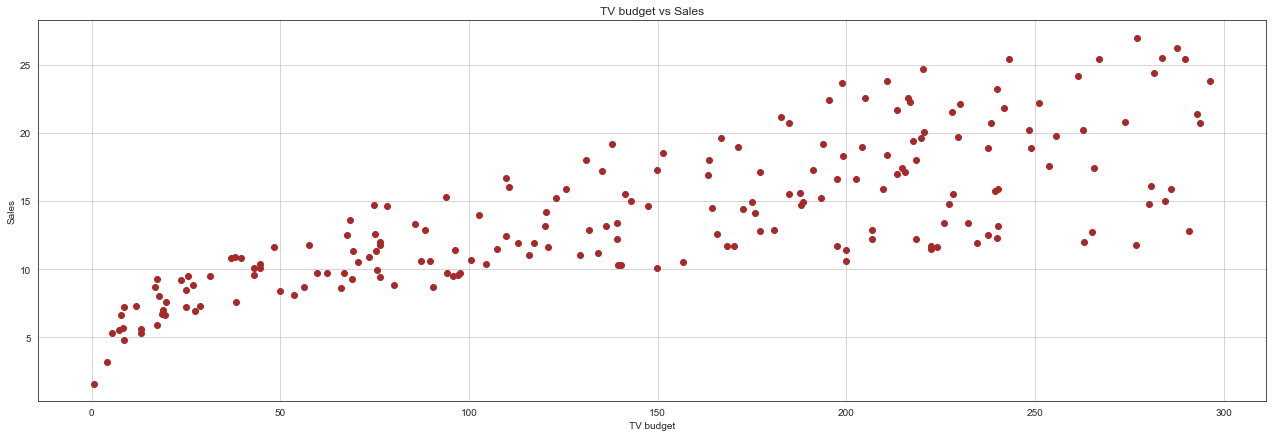

In [7]:
# Scatter plot
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
plt.scatter(dataset.TV,dataset.sales,color="brown")
plt.grid(b=None)
plt.xlabel("TV budget")
plt.ylabel("Sales")
plt.title("TV budget vs Sales")
plt.show()

### Step 3. Pre-process and extract the features

In [8]:
# Normalize the data (converting features of different scale into values between 0 and 1)
from sklearn import preprocessing
x = dataset.values                                    # returns numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.head()

,0,1,2,3
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.303150
3,0.509976,0.832661,0.511873,0.665354
4,0.609063,0.217742,0.510994,0.444882


In [9]:
# Load TV into X and sales into Y variable
X = df.iloc[:,0].values      # Budget spent on TV
Y = df.iloc[:,3].values      # Sales 
#.values return pandas type to numpy array type

### Step 4. Split the data for training and testing

In [10]:
# Splitting dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# random_state = 0 does not return records in random. 
# It returns first 80% for training and remaining 20% for testing.

### Step 5: Training phase (bulding the model) using Gradient Descent

##### Parameter initialization

In [11]:
# np.random.seed(13)
# number of iterations (epochs)
epoch = 1000
# learning rate
learn_rate = 0.001

##### Objective, Derivative, Loss (error/cost) function

In [12]:
# Prediction function  
def predict(m, b, x_train):
    return m * x_train + b

In [13]:
# Partial derivative of SSE(m,b) with respect to m
def deriv_m(x_train, y_train, y_predicted):
    return -2 * (x_train * (y_train - y_predicted)).sum()

# Partial derivative of SSE(m,b) with respect to m
def deriv_b(y_train, y_predicted):
    return  -2 * (y_train - y_predicted).sum()

In [14]:
# SSE (cost/loss/error) calculation
def cost_fun(y_train,y_predicted):
    error = (y_train - y_predicted)**2  
    SSE = error.sum()
    return SSE

##### Gradient descent algorithm for 2 parameters

In [15]:
# Gradient descent algorithm
def gradient_descent():
    # track all solutions
    solutions_m, solutions_b, cost = list(), list(), list()
    
    # generate an initial point for m and b  
    curr_soln_m = 0
    curr_soln_b = 0
    
    # run the gradient descent
    for i in range(epoch): 
        
        # prediction
        y_predicted = predict(curr_soln_m, curr_soln_b, x_train)
        
        # gradient calculation
        gradient_m = deriv_m(x_train, y_train, y_predicted)
        gradient_b = deriv_b(y_train, y_predicted)
        
        # step size calculation
        step_size_m = learn_rate * gradient_m
        step_size_b = learn_rate * gradient_b    
        
        # solution update
        curr_soln_m = curr_soln_m - step_size_m 
        curr_soln_b = curr_soln_b - step_size_b 
       
        # SSE (error/cost/loss) calculation
        SSE = cost_fun(y_train, y_predicted)
        
        # store the solution
        solutions_m.append(curr_soln_m)
        solutions_b.append(curr_soln_b) 
        cost.append(SSE)
        
        # report the progress
        # print('>epoch %d => m %.5f b %.5f cost %.3f ' % (i, curr_soln_m, curr_soln_b,SSE)) 
        
    return [solutions_m, solutions_b, cost, y_predicted]

In [16]:
# perform the gradient descent search
solutions_m, solutions_b, cost, y_train_pred = gradient_descent()

In [17]:
m = solutions_m[epoch-1]
b = solutions_b[epoch-1]
print("y = m x + b ==>  y = ",round(m,2)," x + ",round(b,2))

y = m x + b ==>  y =  0.54  x +  0.23


##### Visualizing the model

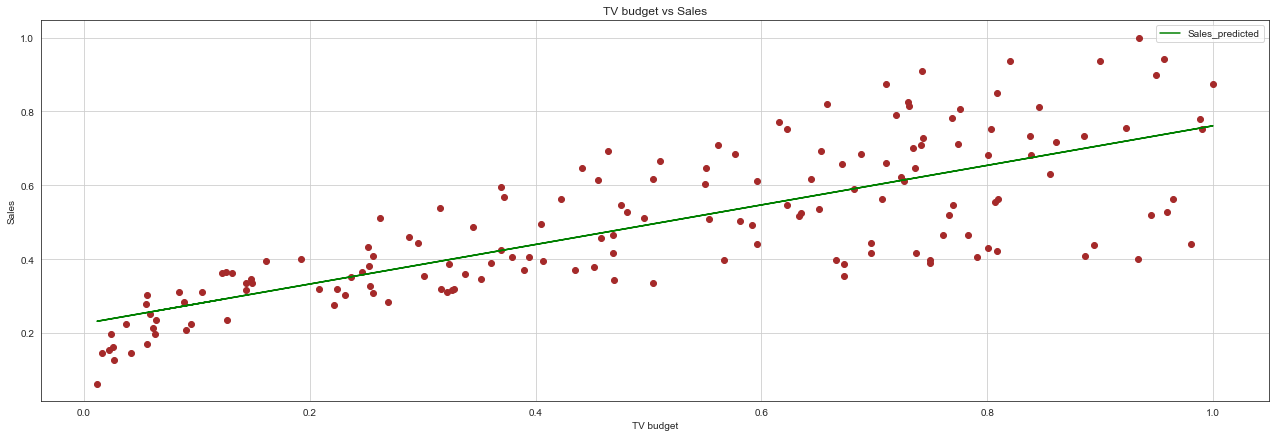

In [18]:
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
plt.scatter(x_train,y_train,color="brown")
plt.grid(b=None) 
plt.plot(x_train,y_train_pred,"g",label="Sales_predicted")
plt.xlabel("TV budget")
plt.ylabel("Sales")
plt.title("TV budget vs Sales")
plt.legend()
plt.show()

##### Plotting observed sale (x) and predicted sale (y) for training set

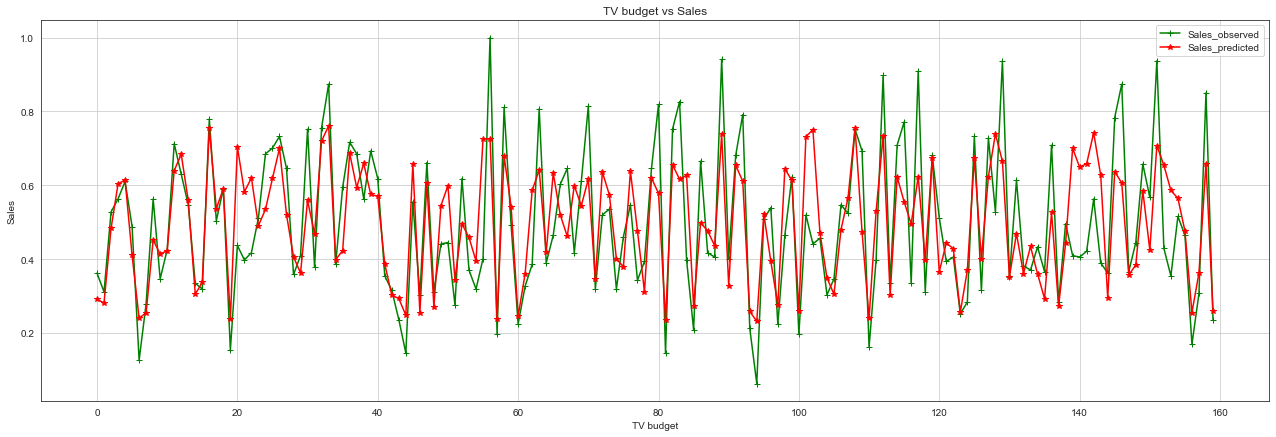

In [19]:
# Predicting the Test set results
x = np.arange(len(y_train_pred)) 
fig = plt.figure(figsize=(22,7)) 
plt.plot(x,y_train,"g-+",label="Sales_observed")
plt.plot(x,y_train_pred,"r-*",label="Sales_predicted")
plt.grid(b=None) 
plt.xlabel("TV budget")
plt.ylabel("Sales")
plt.title("TV budget vs Sales")
plt.legend()
plt.show() 

#### Residual/Error standard deviation plot

If the model has done good predictions, then the datapoints are near around to 0.

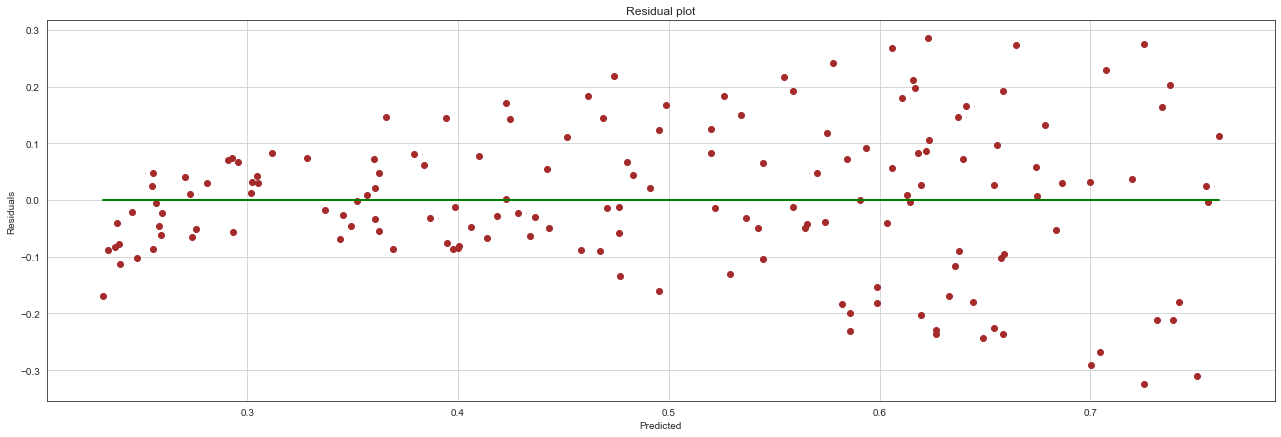

In [20]:
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
residuals = y_train-y_train_pred
zeros = y_train-y_train
plt.scatter(y_train_pred,residuals,color="brown")
plt.grid(b=None) 
plt.plot(y_train_pred,zeros,"g")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual plot") 
plt.show()

##### Plotting cost (SSE) function minimization

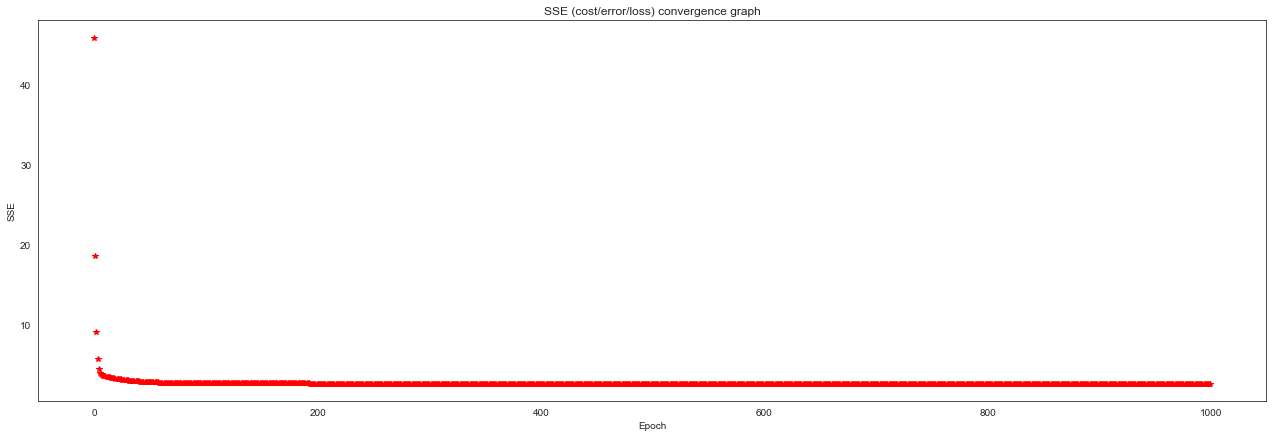

In [21]:
x = np.arange(epoch) 
fig = plt.figure(figsize=(22,7)) 
plt.plot(x,cost,"r*")  
plt.xlabel("Epoch")
plt.ylabel("SSE")  
plt.title("SSE (cost/error/loss) convergence graph")
plt.show() 

##### Plotting slope (m) and intercept (b) variation

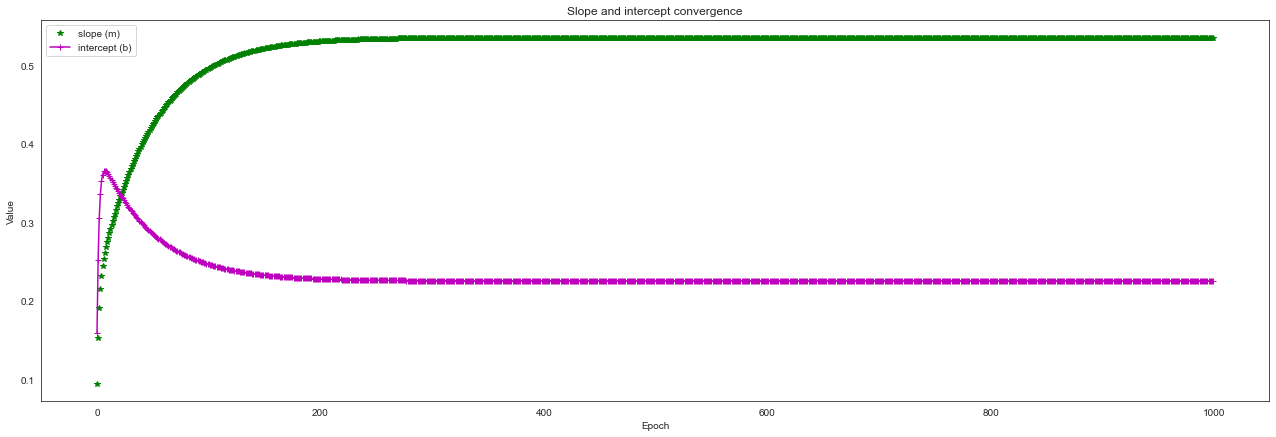

In [22]:
x = np.arange(epoch) 
fig = plt.figure(figsize=(22,7)) 
plt.plot(x,solutions_m,"g*",label="slope (m)") 
plt.plot(x,solutions_b,"m+-",label="intercept (b)") 
plt.xlabel("Epoch")
plt.ylabel("Value")  
plt.title("Slope and intercept convergence")
plt.legend(loc="best")
plt.show()  

### Different error calculations to asses the model for training set

##### 1. Sum of Squared Error (SSE)

\begin{equation}
SSE(m,b) = \sum_{i=1}^{n}(y_{i}-\hat y)^{2} = \sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}
\end{equation}

In [23]:
sum = 0   
n = len(x_train)  
for i in range (0,n):   
  diff = y_train[i] - y_train_pred[i]   
  squ_diff = diff**2   
  sum = sum + squ_diff   
Train_SSE = np.round(sum,2)
print("Sum of Squared Error (SSE) :",Train_SSE)

Sum of Squared Error (SSE) : 2.63


##### 2. Mean Squared Error (MSE)

\begin{equation}
MSE(m,b) = \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n} = \frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}
\end{equation}

In [24]:
Train_MSE = np.round(Train_SSE/n,2)
print("Mean Squared Error (MSE) :",Train_MSE)

Mean Squared Error (MSE) : 0.02


##### 3. Root Mean Squared Error (RMSE)

\begin{equation}
RMSE(m,b) = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n}} = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}}
\end{equation}

In [25]:
Train_RMSE = np.round(np.sqrt(Train_MSE),2)
print("Root Mean Squared Error (RMSE) :",Train_RMSE)

Root Mean Squared Error (RMSE) : 0.14


##### 4. Mean Absolute Error (MAE)

\begin{equation}
MAE(m,b) = \frac{\sum_{i=1}^{n}\left\lvert(y_{i}-\hat y)\right\lvert}{n} 
\end{equation}

In [26]:
sum = 0   
n = len(x_train)  
for i in range (0,n):   
  diff = y_train[i] - y_train_pred[i]   
  sum = sum + np.abs(diff)   
Train_MAE = np.round(sum/n,2)
print("Mean Absolute Error (MAE) :",Train_MAE)

Mean Absolute Error (MAE) : 0.1


##### 5. Mean Absolute Percentage Error (MAPE)

\begin{equation}
MAPE(m,b) = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-\hat y)}{y_{i}}\right\lvert  = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-(m*x_{i}+b))}{y_{i}}\right\lvert 
\end{equation}

In [27]:
sum = 0   
n = len(x_train)  
for i in range (0,n):   
  diff = (y_train[i] - y_train_pred[i])/y_train[i]
  sum = sum + np.abs(diff)  
Train_MAPE = np.round(sum/n*100,2)
print("Mean Absolute Percentage Error (MAPE) :",Train_MAPE) 

Mean Absolute Percentage Error (MAPE) : 23.51


### Calculating R-Squred value (goodness of model) using SSE

\begin{equation}
R^{2} = 1- \frac{SSE}{SST} = 1- \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{\sum_{i=1}^{n}(y_{i}-\bar y)^{2}} 
\end{equation}

In [28]:
from sklearn.metrics import r2_score
out = r2_score(y_train,y_train_pred)
Train_RS = np.round(out,2)*100
print("R-Squred value (goodness of model) for training set :",Train_RS,"%") 

R-Squred value (goodness of model) for training set : 59.0 %


### Step 6: Testing phase

In [29]:
# Predicting values for test input set
y_test_pred = predict(m, b, x_test) 

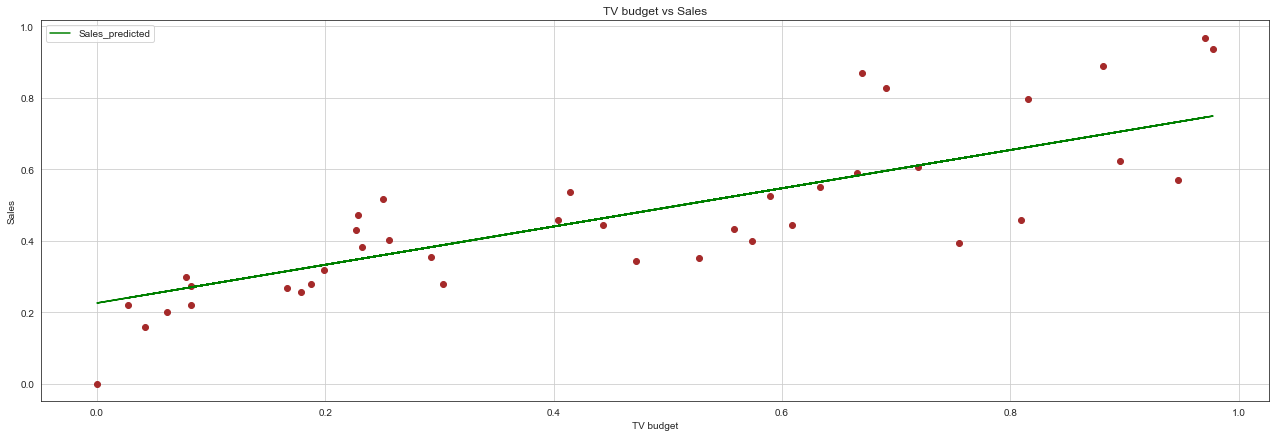

In [30]:
# Plotting the predicted values
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
plt.scatter(x_test,y_test,color="brown")
plt.grid(b=None) 
plt.plot(x_test,y_test_pred,"g",label="Sales_predicted")
plt.xlabel("TV budget")
plt.ylabel("Sales")
plt.title("TV budget vs Sales")
plt.legend()
plt.show()

##### Plotting observed sale (x) and predicted sale (y) for test set

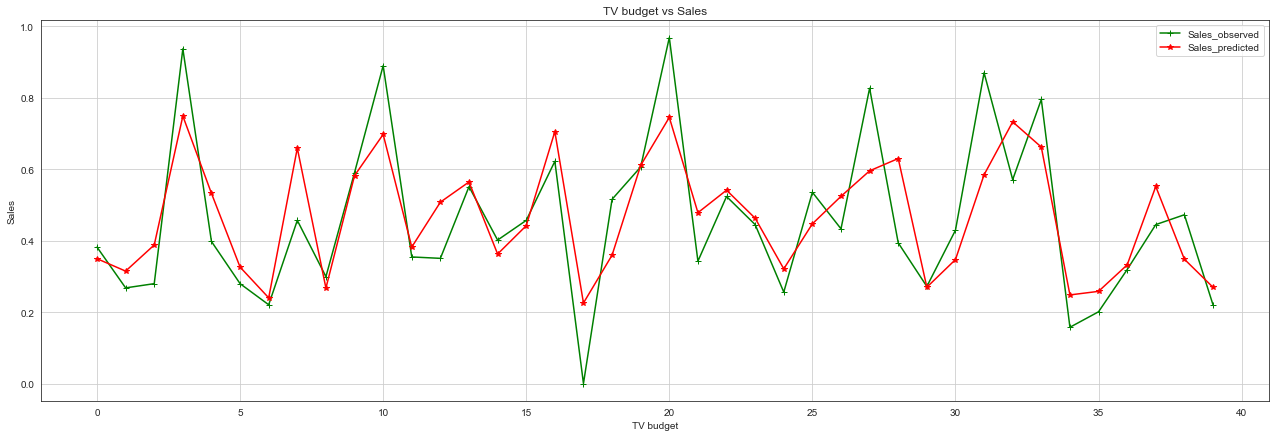

In [31]:
x = np.arange(len(y_test_pred)) 
fig = plt.figure(figsize=(22,7)) 
plt.plot(x,y_test,"g-+",label="Sales_observed")
plt.plot(x,y_test_pred,"r-*",label="Sales_predicted")
plt.grid(b=None) 
plt.xlabel("TV budget")
plt.ylabel("Sales")
plt.title("TV budget vs Sales")
plt.legend()
plt.show() 

#### Residual (Error) plot

If the model has done good predictions, then the datapoints must be near around to horizontal line.

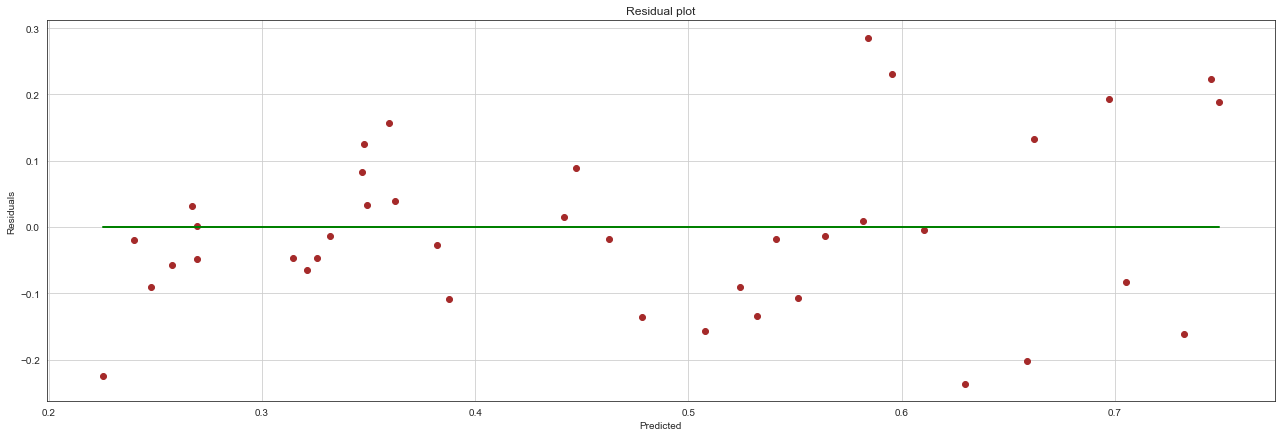

In [32]:
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
residuals = y_test-y_test_pred
zeros = y_test-y_test
plt.scatter(y_test_pred,residuals,color="brown")
plt.grid(b=None) 
plt.plot(y_test_pred,zeros,"g")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()

#### Storing the outcome in a file

In [33]:
# Store the predicted value for sales in new column
dataset.rename(columns={'sales': 'observed_sales'}, inplace=True)
sales_data = dataset.iloc[:,0].values.reshape(-1, 1)
predicted_values = predict(m,b,sales_data)
dataset['predicted_sales'] = predicted_values
dataset.head()

,TV,radio,newspaper,observed_sales,predicted_sales
0,230.1,37.8,69.2,22.1,123.469328
1,44.5,39.3,45.1,10.4,24.060043
2,17.2,45.9,69.3,9.3,9.437880
3,151.5,41.3,58.5,18.5,81.370353
4,180.8,10.8,58.4,12.9,97.063737


In [34]:
# Write the above output input into new csv
# dataset.to_csv("Gradient Descenet for Linear Regression output.csv") 

### Different Error calculations to asses the model for the test set

##### 1. Sum of Squared Error (SSE)

\begin{equation}
SSE(m,b) = \sum_{i=1}^{n}(y_{i}-\hat y)^{2} = \sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}
\end{equation}

In [35]:
sum = 0   
n = len(x_test)  
for i in range (0,n):   
  diff = y_test[i] - y_test_pred[i]   
  squ_diff = diff**2   
  sum = sum + squ_diff   
Test_SSE = np.round(sum,2)
print("Sum of Squared Error (SSE) :",Test_SSE)

Sum of Squared Error (SSE) : 0.63


##### 2. Mean Squared Error (MSE)

\begin{equation}
MSE(m,b) = \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n} = \frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}
\end{equation}

In [36]:
Test_MSE = np.round(Train_SSE/n,2)
print("Mean Squared Error (MSE) :",Test_MSE)

Mean Squared Error (MSE) : 0.07


##### 3. Root Mean Squared Error (RMSE)

\begin{equation}
RMSE(m,b) = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n}} = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}}
\end{equation}

In [37]:
Test_RMSE = np.round(np.sqrt(Test_MSE),2)
print("Root Mean Squared Error (RMSE) :",Test_RMSE)

Root Mean Squared Error (RMSE) : 0.26


##### 4. Mean Absolute Error (MAE)

\begin{equation}
MAE(m,b) = \frac{\sum_{i=1}^{n}\left\lvert(y_{i}-\hat y)\right\lvert}{n} 
\end{equation}

In [38]:
sum = 0   
n = len(x_test)  
for i in range (0,n):   
  diff = y_test[i] - y_test_pred[i]   
  sum = sum + np.abs(diff)   
Test_MAE = np.round(sum/n,2)
print("Mean Absolute Error (MAE) :",Test_MAE)

Mean Absolute Error (MAE) : 0.1


##### 5. Mean Absolute Percentage Error (MAPE)

\begin{equation}
MAPE(m,b) = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-\hat y)}{y_{i}}\right\lvert  = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-(m*x_{i}+b))}{y_{i}}\right\lvert 
\end{equation}

In [39]:
sum = 0   
n = len(x_test)  
for i in range (0,n): 
    if y_test[i] == 0:
        continue
    else: 
        diff = (y_test[i] - y_test_pred[i])/y_test[i]
        sum = sum + np.abs(diff)   
Test_MAPE = np.round(sum/n*100,2)
print("Mean Absolute Percentage Error (MAPE) :",Test_MAPE) 

Mean Absolute Percentage Error (MAPE) : 20.4


### Calculating R-Squred value (goodness of model) using SSE

\begin{equation}
R^{2} = 1- \frac{SSE}{SST} = 1- \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{\sum_{i=1}^{n}(y_{i}-\bar y)^{2}} 
\end{equation}

In [40]:
from sklearn.metrics import r2_score
out = r2_score(y_test,y_test_pred)
Test_RS = np.round(out,2)*100
print("R-Squred value (goodness of model) for testing set :",Test_RS,"%")  

R-Squred value (goodness of model) for testing set : 68.0 %


### Underfitting and overfitting observation

In [41]:
print("Error \t From training phase       From testing phase ")
print("===================================================")
print("SSE   \t\t",Train_SSE,"\t\t\t", Test_SSE)
print("MSE   \t\t",Train_MSE,"\t\t\t", Test_MSE)
print("RMSE   \t\t",Train_RMSE,"\t\t\t", Test_RMSE)
print("MAE   \t\t",Train_MAE,"\t\t\t", Test_MAE)
print("RS   \t\t",Train_RS,"\t\t\t", Test_RS)

Error 	 From training phase       From testing phase 
SSE   		 2.63 			 0.63
MSE   		 0.02 			 0.07
RMSE   		 0.14 			 0.26
MAE   		 0.1 			 0.1
RS   		 59.0 			 68.0
